In [90]:
### importing libaries###
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
##loading the data##
df = pd.read_csv(r"C:\Users\olive\OneDrive\Desktop\global_climate_energy_2020_2024.csv")

In [92]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60


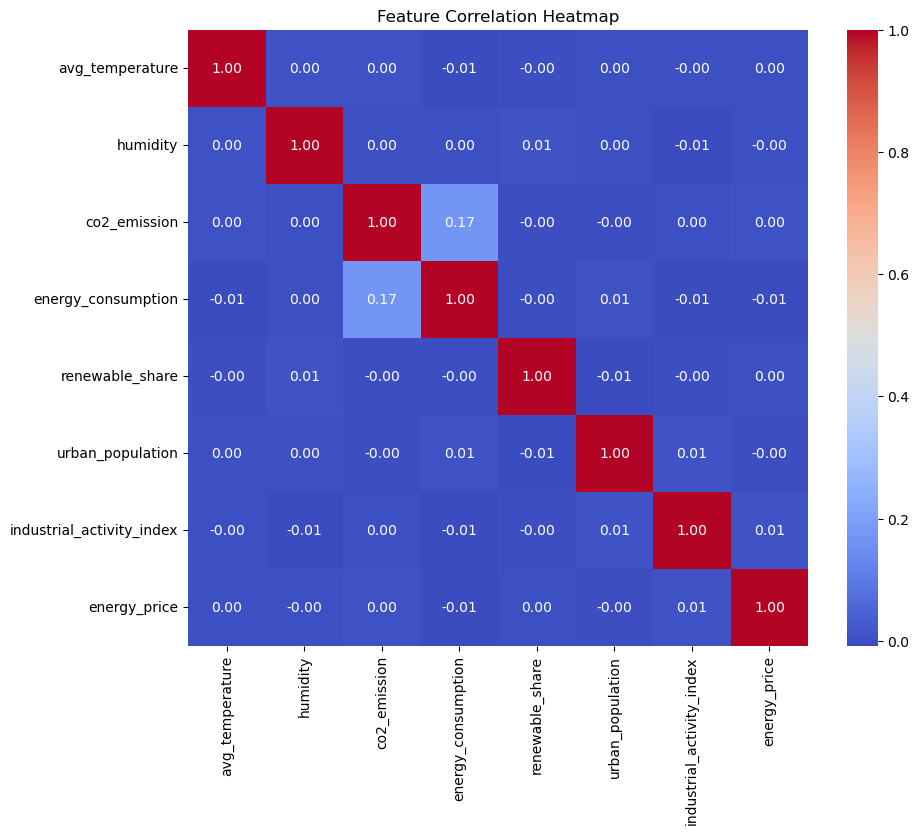

In [93]:
### select only numeric columns ###
numeric_df = df.select_dtypes(include=['int64', 'float64'])

###  correlation matrix ###
corr = numeric_df.corr()

# ##plot heatmap ###
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [94]:
### checking all  columns, data types, and missing values ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB


In [95]:
### Summary statistics for numeric columns ###
df.describe()

,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
count,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000
mean,13.580868,59.971469,445.820452,7295.904857,15.944080,74.982156,70.173094,115.279848
std,10.077249,17.303103,234.360906,3693.928504,5.334804,8.645400,17.334816,49.178361
min,-9.600000,30.000000,50.150000,1001.890000,5.000000,60.000000,40.000000,30.000000
25%,5.630000,45.010000,248.675000,4184.177500,12.020000,67.470000,55.300000,72.420000
50%,13.790000,59.990000,422.655000,6921.620000,15.715000,75.030000,70.055000,115.240000
75%,20.840000,74.970000,628.422500,10175.110000,19.840000,82.502500,85.260000,158.270000
max,38.710000,90.000000,999.850000,15998.050000,30.870000,90.000000,100.000000,200.000000


In [96]:
X = df.drop(columns=['energy_consumption'])  
y = df['energy_consumption']          

In [97]:
# keeping only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")

RMSE: $3,652.99
R²: 0.0305


In [102]:
errors = y_test - y_pred
errors.describe()

count    7308.000000
mean      -29.777328
std      3653.116986
min     -6743.236176
25%     -3106.557730
50%      -416.411513
75%      2818.833578
max      9448.847987
Name: energy_consumption, dtype: float64

In [103]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Sort from strongest positive to negative
coef_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
4,urban_population,2.800835
2,co2_emission,2.688137
1,humidity,0.565422
6,energy_price,-0.520359
3,renewable_share,-0.667346
5,industrial_activity_index,-2.317793
0,avg_temperature,-3.726194


In [104]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [105]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Scaled RMSE: ${rmse_scaled:,.2f}")
print(f"Scaled R²: {r2_scaled:.4f}")

Scaled RMSE: $3,652.99
Scaled R²: 0.0305


In [106]:
coef_scaled_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model_scaled.coef_
})

coef_scaled_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
2,co2_emission,631.332643
4,urban_population,24.206965
1,humidity,9.793579
3,renewable_share,-3.556103
6,energy_price,-25.592349
0,avg_temperature,-37.581650
5,industrial_activity_index,-40.223546


### USING THE RANDOM FOREST MODEL SO AS TO COMPARE AND UNDERSTAND METRICS AND HOW ADDED AND DROPPED FEATURES HAS AN EFFECT ### 

In [107]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\olive\OneDrive\Desktop\global_climate_energy_2020_2024.csv")

In [108]:
### Handling the date column ###
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [109]:
###encoding the categorical values###
df = pd.get_dummies(df, drop_first=True)

In [110]:
### defining X and Y ###
X = df.drop(columns=['energy_consumption', 'date'])
y = df['energy_consumption']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [112]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [113]:
rf_pred = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
r2_rf = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rmse_rf:,.2f}")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest RMSE: 3,427.82
Random Forest R²: 0.1463


### FINAL RESULT IN TABULAR FORM ###

| MODEL | RMSE| R² |
|:-------------|:--------------:|--------------:|
| Linear Regression         | 3,652.99           | 0.0305         |
| Random Forest   | 3,427.82      | 0.1463    |